# Deep Learning inference with AWS Lambda and Amazon EFS

The following code demonstrates how to call an AWS Lambda function that hosts a SSD (Single Shot MultiBox Detector) model for object detection. The AWS Lambda function loads the model and the Tensorflow 2 libraries from Amazon EFS.

First, we need to make sure TensorFlow 2.2.0 is installed.

In [ ]:
# Install Tensorflow 2.2.0; then remember to restart the Jupyter kernel.
!pip install --upgrade pip
!pip install tensorflow=='2.2.0'

Then, we can set two variables:
- The URL of the image used for inference
- The ARN (Amazon Resource Name) of the Lambda function hosting the model

In [1]:
image_url = 'https://images.pexels.com/photos/310983/pexels-photo-310983.jpeg?auto=compress&w=900&h=595'
function_arn = "LambdaEFSMLDemo-LambdaEFSMLExecuteInference17332C2-XXXXXXXXXXXX"

Now, we can download the image. Please note that, since the AWS Lambda function will take the image URL as parameter, you need to make sure the size matches.

Image downloaded to /tmp/tmpilzzxm7t.jpg.


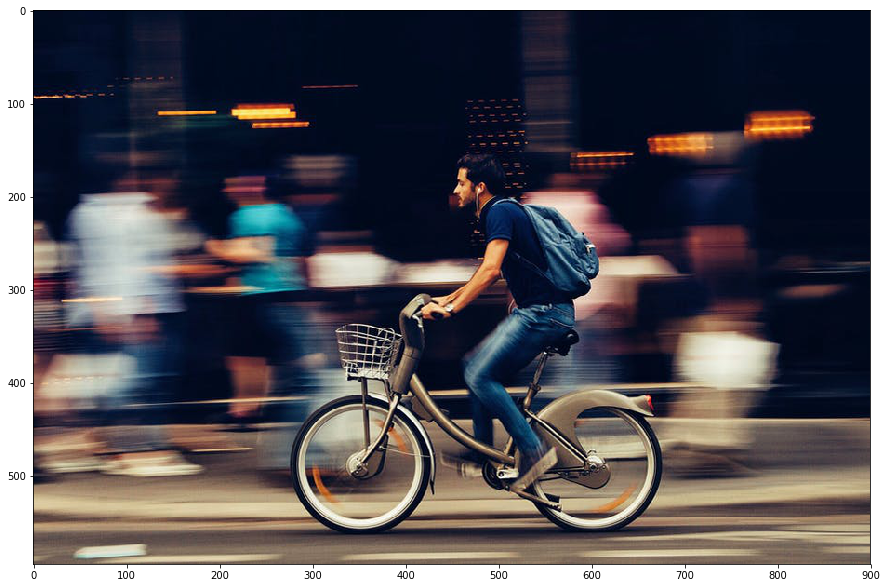

In [6]:
from utils import download_and_resize_image
downloaded_image_path = download_and_resize_image(image_url, 900, 595, True)

Let's invoke the Lambda function and print the returned object detection classes and scores (we do not print the bounding boxes for cleaness).

In [12]:
import boto3
import json

lambda_client = boto3.client('lambda')

payload = '{"url": "' + image_url + '" }'

response = lambda_client.invoke(
    FunctionName=function_arn,
    InvocationType='RequestResponse',
    Payload=payload.encode('utf-8')
)

result = json.loads(response['Payload'].read())
result = json.loads(result['body'])

print('\x1B[34m')
print('Detected classes:')
print(result["detection_class_entities"])
print('\nConfidence scores:')
print(result["detection_scores"])


Detected classes:
['Bicycle', 'Person', 'Wheel', 'Wheel', 'Bicycle wheel', 'Man', 'Footwear', 'Bicycle wheel', 'Footwear', 'Footwear', 'Clothing', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Person', 'Man', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Clothing', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Person', 'Footwear', 'Footwear', 'Footwear', 'Man', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Human arm', 'Footwear', 'Human arm', 'Clothing', 'Tire', 'Footwear', 'Clothing', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Clothing', 'Clothing', 'Footwear', 'Clothing', 'Footwear', 'Footwear', 'Human arm', 'Man', 'Bicycle', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Footwear', 'Man', 'Human arm', 'Drum', 'Footwear', 'Footwear', 'Footwear', 'Wheel', 'Footwear', 'Bicycle', 'Footwear', 'Footwear', 'Footwear

Finally, we can use utility functions to draw the bounding boxes on the image. We are displaying 10 bounding boxes only, sorted by confidence scores, where the detection confidence score is higher than 0.3

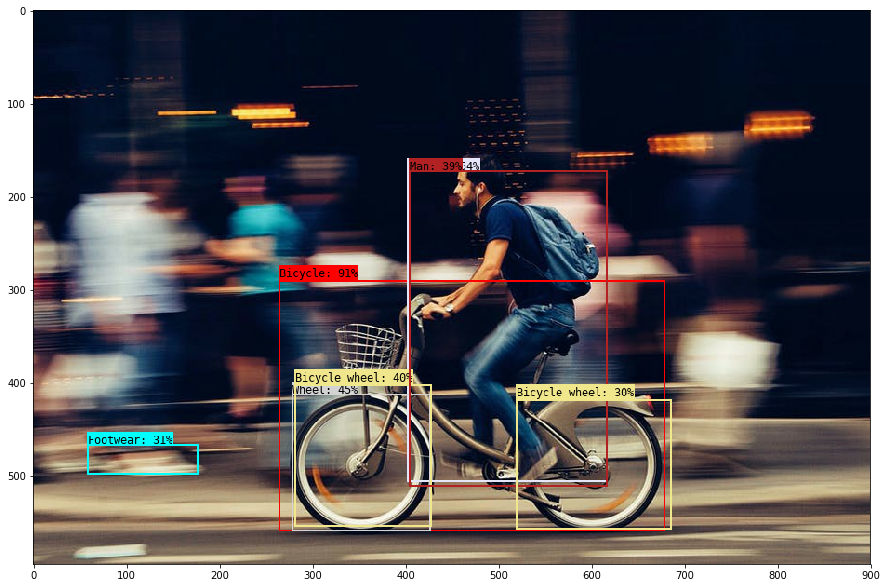

In [13]:
import numpy
from utils import load_img, draw_boxes, display_image

img = load_img(downloaded_image_path)

image_with_boxes = draw_boxes(
      img.numpy(), numpy.asarray(result["detection_boxes"]),
      result["detection_class_entities"], numpy.asarray(result["detection_scores"]), 
      max_boxes=10, min_score=0.3)

display_image(image_with_boxes)